# Module 2: Supervised Learning

**Module Overview:**

**Dataset:**

## Introduction to Supervised Learning

**Supervised learning** involves machine learning algorithms that aim to build models that learn from the data and are able to predict future values. It is the same as building a mathematical equation or formula with many input variables in order to be able to derive the desired output variable. 
**The data points that the model uses to learn, already have the corresponding outputs.** This is how the model is able to derive a connection between inputs and outputs. 

There are two types of problems in the supervised setting: *regression* and *classification*. In **regression**, the output that the model learns and then tries to predict is a continuous value (e.g learning age, height of people, etc). In **classification**, the output that the model learns and then tries to predict is a categorical value (e.g a class from a finite number of classes like the whether a tumor cell is benign or malignant). 

[Figure 1](#sup_lear_reg_clf) illustrates the machine learning pipeline when in case of supervised learning. From the figure we can see that there are three main parts in the pipeline: (1) **Pre-processing of Data**, (2) **Training of the model** and (3) **Evaluation of the model**. During pre-processing, the raw data undergoes transformations so that it is ready to be used in training. We have already described this steps in Module 1. The pre-processed data is split into train and test sets. During training, the model will use the train set to learn. After training is done, the test set is used to evaluate the performance of the model. This is a way to quantify how well the model has learned the data. When the model is ready to be used, it will receive new, unseen samples and will predict either a continuous value or a label, depending on whether the task at hand is regression or classification.

<center>
    <a id="sup_learn"></a>
    <img src="images/part2_supervised/supervised_learning_pipeline.jpg" alt="ML Supervised Learning" width="90%">
    <center><figcaption><em>Figure 1: Supervised Learning</em></figcaption></center>
</center>


###  Regression

In the case of regression, the model learns from the data, with the aim of outputting a continuous value similar to what it saw during the training phase. 
<center>
    <a id="regression"></a>
    <img src="images/part2_supervised/regression_illustration.jpg" alt="Regression" width="90%">
    <center><figcaption><em>Figure 2: Regression</em></figcaption></center>
</center>


[Figure 2](#regression) gives an illustration of regression in a 2D dataset. In this case, we have samples that have two coordinates: x and y. y depends on x, so y = f(x). The aim of regression would be to find a function f(x) that *best* approximates the corresponding values of y. *Best* is quantified through the loss metrics that we are going to see in the next section. In our example, this would be <span style="color:red">a line of the form $$y=ax+b$$</span>, <span style="color:red">indicated in red</span>. After the function is learned from the data, then we can use it to <span style="color:green">predict the value on a new unseen sample during training (indicated by green)</span>. 

Note that in real life, datasets have more than 2 dimensions. In this case, a line is not sufficient, that is why a plane (3 coordinates) or a hyperplane(+3 coordinates) will be used as the regressor model to predict values. This is called **multiple linear regression**, in contrast to the example shown in Figure 2, which is **simple linear regression**.

Besides linear regression, which assumes linear relationship between the variables, there are other types of regression like Decision Tree regression and Random Forest regression, which we will code below.

### Classification

In classification, the target variable that the model tries to learn from the data and later predict is a class or a category. 

<center>
    <a id="classification"></a>
    <img src="images/part2_supervised/classification_illustration.jpg" alt="Classification" width="90%">
    <center><figcaption><em>Figure 3: Classification</em></figcaption></center>
</center>

[Figure 3](#classification) shows an example of samples in a 2D coordinate system. As you can see, the samples belong to two classes: <span style="color:red">positive</span> and <span style="color:green">negative</span>. As we can see, the samples of the two classes are linearly separable. So, the model can learn a line that can perfectly separate the two classes. <span style="color:blue">This line is indicated with blue</span> in our example. A new, unseen sample will be classified based on which side of the boundary it will fall. In our case, the circled sample is below the boundary line, so the model will classify it as <span style="color:red">red</span>.

Note that in real life scenarios, datasets have many more dimensions and classes. Also, classes may not be linearly separable. In this cases, the models will be hyperplanes or other structures that will be able to capture non-linear dependencies. In this tutorial, we will see in action Logistic Regression, Decision Tree classifiers and Random Forest classifiers.

## Training of Supervised Learning Models

### Parameters vs Hyperparameters


In machine learning, parameters and hyperparameters play different roles. The **parameters** are values that **the machine learning model learns from the data**. At the end of the learning process, the data will be described by a mathematical equation. The main goal of the learning process is to find the parameters of this mathematical equation that would best describe the data. For example, suppose that you have some points scattered in a 2D coordinate system, just like in [Figure 2](#regression). Your aim is to find the line with an equation of the form: $$y = ax + b$$. 

In this case, `a` and `b` would be the parameters that the model would learn from the points so that the line would represent them in the best possible way.

On the other hand, **hyperparameters control the learning process itself and how the parameters will be computed**. Hyperparameters are set by the data scientists/analysts and they are not learned by the model. You can think of them as **settings or configurations to tune the learning process**. Usually people use intuition, trial-and-error, and other, more sophisticated techniques like cross-validation to pick the right hyperparameters that would make the learning process faster and produce more accurate results. Going to the line example, the hyperparameters will determine **how complex** the equation of the line that will describe the points will be. 

All in all, **parameters determine the model output, while hyperparameters determine the way how the parameters would be learned**. You can read more about the distinction between parameters and hyperparameters [in this blog post](https://towardsdatascience.com/parameters-and-hyperparameters-aa609601a9ac).


💡 **CHECKPOINT:**
- How do parameters differ from hyperparameters? What role does each of them play in the learning process?
- What is tuned by the data analyst and what is learned by the model?
- Determine which of the following are parameters and which are hyperparameters in the following scenario: *We have a dataset that contains 1000 points, each of them having a single feature. The function that will approximate these points will have the form $y=ax^2+bx+c$. We do not want the model to overfit the data, so we set a regularization parameter λ=0.1, to be used during the training process. Since we do not want to wait long, we also determine the number of steps that the loss function will be computed and the weights updated, n=100.* Given this scenario, determine whether a, b, c, λ and n are parameters or hyperparameters.

### Cost function

The **cost function**, an essential part of all machine learning algorithms, quantifies how well the model can approximate the data. It is otherwise known as loss metric, loss function or objective function. It measures, how different are the predicted values of the model from the actual values, being them discrete or continuous. 

The cost function is a function of the parameters of the model. For example, in regression tasks, a common cost function used is the **mean squared error**(MSE): $$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2$$, where $y_i$ is the actual value and $\hat{y_i}$ is the predicted value for sample $i$. Referring to [Figure 2](#regression), $\hat{y_i}=ax_i + b $ and the cost function can be written as:$$\text{MSE}=L(a,b)=\frac{1}{n} \sum_{i=1}^{n} (y_i - (ax_i + b))^2$$. We need to find the values of $a$ and $b$, for which minimum $MSE$ is attained. This can be solved analytically by finding the derivative of $L$ with respect to $a$ and $b$, then equalizing them to 0 and solving them for $a$ and $b$. However, an analytic solution is not always possible. That is why, to find the optimal parameters, algorithms like Gradient Descent are used. Gradient Descent is able to find the optimal solutions by computing the predictions and loss function in multiple iterations. [Figure 4](#gradient-descent) illustrates the process. You can learn more about Gradient Descent [here](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21). 

Note that MSE is not the only cost function used in regression tasks. Other cost functions include: mean error, mean absolute error, etc.

<center>
    <a id="gradient-descent"></a>
    <img src="images/part2_supervised/lin_reg.gif" alt="Gradient Descent" width="90%">
    <center><figcaption><em>Figure 3: Cost function in Linear Regression</em></figcaption></center>
</center>


The concept of cost function in classification is the same, however, there are different cost functions applied in these tasks. Two common cost functions used are: **binary cross-entropy** and **categorical cross-entropy**, the first one used in binary class classification problems, while the later one used in multi-class classification problems. Again, during training, the parameters of the model are adjusted to  minimize the value of the cost function, iteratively, using algorithms like Gradient Descent.

Cost functions are not only used during training but also during model evaluation, as we will see in the next section.

## Evaluation of a Supervised Learning Models

Evaluation metrics help us in assessing the effectiveness of a machine learning model on a given task. They are important in quantifying how well the models have learned from the data they were trained on, as well as how suitable a machine learning model is a for specific task.

There are many evaluation metrics, depending on the task (classification or regression) and the characteristics of the dataset (e.g imbalanced classes, etc). Below we will explore some of the evaluation metrics used for classification and regression.

### Evaluation metrics for regression

**Mean Squared Error (MSE)** and **R-squared (R2)** are two of the most used evaluation metrics in regression task. The formula for calculating MSE is: $$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2$$,
the same as in the previous section, since MSE can be used both for evaluation of the model and as a cost function.

The formula for R2 is:$$R^2 = 1 - \frac{RSS}{TSS}$$, where:
-  $RSS$ is **the sum of squared residuals** calculated as: $RSS = (y_i - \hat{y_i})^2$, where $y_i$ is the target value for sample $i$ and the $\hat{y_i}$ is the predicted value for sample $i$.
- $TSS$ is **the total sum of squares**  calculated as: $TSS = (y_i - \bar{y})^2$, where $y_i$ is the target value for sample $i$ and $\bar{y}$ is the mean of the target values. 

R2 measures the proportion of variance in the target variable  that is explained by the model. It varies between 0 and 1. An R2 of 1 indicates that the models does not capture any variance in the target variable at all, while an R2=1 indicates that the model captures all the variance in the target variable.

[Figure 4](#squared-errors) gives an illustration of the squared errors for different regression lines. The error ($y_i-\hat{y_i}$) is considered to be the vertical distance between the y coordinate of the point and the regression line, shown in red.

<center>
    <a id="squared-errors"></a>
    <img src="images/part2_supervised/linear_regression.gif" alt="Linear Regression errors" width="40%" height="40%">
    <center><figcaption><em>Figure 4: Linear Regression Squared Errors</em></figcaption></center>
</center>


### Evaluation metrics for classification

Some of the most used evaluation metrics in classification problems are: **accuracy**, **F1-score**, **receiver operating characteristic (ROC) curve** and **precision recall (PRC) curve**. The last two metrics are graphs and we are more interested in the area under this graph. Before analyzing the metrics, it is important to know and understand these terms:
 - **True Positive Samples (TP)**: these are samples that are classified as positive by the model and at the same time they belong to the positive class.
 - **True Negative Samples (TN)**: these are samples that are classified as negative by the model and at the same time they belong to the negative class.
 - **False Positive Samples (FP)**: these are samples that are classified as positive by the model but they belong to the negative class.
 - **False Negative Samples (FN)**: these are samples that are classified as negative by the model but they belong to the positive class.


[Figure 5](#confusion-matrix) gives an illustration of this values. All the valuation metrics we will explore are based on these four values.
<center>
    <a id="confusion-matrix"></a>
    <img src="images/part2_supervised/confusion_matrix.jpg" alt="Confusion Matrix" width="40%" height="40%">
    <center><figcaption><em>Figure 5: Confusion Matrix</em></figcaption></center>
</center>
 

1. **Accuracy** - it is the proportion of correctly classified samples by the model out of all samples: $Accuracy = \frac{TP+TN}{N}$, where $N$ is the total number of samples tested.
2. **F1-score** - it is the harmonic mean of precision and recall, where:
    - $Precision = \frac{TP}{TP+FP}$, is the ratio between the true positive samples and the total samples classified as positive by the model and,
    - $Recall = \frac{TP}{TP + FN}$, is the ratio of the true positive samples and the total real positive samples. 
F1 score balances these metrics and it is helpful especially in dealing with imbalanced classes. F1 score ranges from 0 to 1, with values near 1 indicating a good model.
3. **ROC curve** - the ROC curve is a graph that plots the true positive rate (precision) against the false positive rate ($FPR = \frac{FP}{FP + TN}$) at different classification thresholds (e.g at different threshold probabilities to classify a sample as positive: at least 60%). When using this metric, we are more interested in the area under the curve of ROC (**ROC AUC**), the higher the area under the curve ROC, the better the model. The maximum value achievable is 1. For more information on the ROC curve, you can read [this article](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc).
4. **PRC curve** - the PRC curve plots the precision vs the recall across different classification thresholds, just like the ROC curve. Again the higher the value of the area under the curve, the better the performance of the model. The maximum value achievable is 1. 

### Overfitting and Underfitting

Sometimes, in order to better asses the performance of the model, it is necessary to check the performances both on the train and test sets and to compare the metrics. We want a model that has an optimal performance and that is neither underfitting not overfitting.

**Overfitting** - happens when the performance of the model on the train set is a lot better than the test set. In this case, the model has learned the train set *by heart*, but cannot generalize well on new, unseen sample. In other words, the model overfits the train set. Some of the ways to deal with overfitting include: using a less complex model and regularization. 

**Underfitting** - happens when the model cannot learn the underlying relationships of the data because it might be too simple. The performance metrics both in the train and test sets are low. One of the ways to deal with underfitting is by choosing a more complex model.

[Figure 6]() illustrates overfitting and underfitting.
<center>
    <a id="over-under-fitting"></a>
    <img src="images/part2_supervised/overfitting_2.png" alt="Overfitting Underfitting" width="60%" height="60%">
    <center><figcaption><em>Figure 6: Overfitting and Underfitting Illustration [1]</em></figcaption></center>
</center>


<div class="note">
    <b>Regularization:</b>
    <p>It is a way to penalize complex models and thus reduce overfitting. It is part of the training step of the model. The machine learning models are trained on the train set. Thus, they try learn the train set in the best way possible. However, if the model learns the train data by heart, then it will not generalize well on new unseen data. Regularization helps the model become more robust and avoid overfitting. To learn more about regularization, <a href="https://developers.google.com/machine-learning/crash-course/regularization-for-simplicity/video-lecture">see here</a>.</p>
</div>

<style>
    /* Styling for the note admonition */
    .note {
        padding: 10px;
        border-left: 4px solid #007BFF; /* Replace this with your desired border color */
        background-color: #f0f0f0; /* Replace this with your desired background color */
        margin: 10px 0;
    }
</style>


## Regression Models

In this section we are going to code 3 regression models: Linear Regression, Decision Trees and Random Forest and evaluate their performance in the Chocolate Bar Ratings dataset. Note that this dataset is already pre-processed. All pre-processing steps can be found in the `'scripts/clean_chocolate_dataset.py'` file. 

First, we will start by importing the necessary libraries, read the dataset and define some helper functions that we will need.

In [27]:
import os
import pandas as  pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score
import ipywidgets as widgets
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.linear_model import LogisticRegression

In [16]:
filepath = os.path.join( "data", "chocolate_bars_proc.csv")
chocolate_dataset = pd.read_csv(filepath)
chocolate_dataset.head()

,id,bean_origin,year_reviewed,cocoa_percent,num_ingredients,rating,split,year_binary,Other,Peru,Venezuela
0,2454,Other,>=2015,0.771568,-0.04148,3.25,train,1,1,0,0
1,2458,Other,>=2015,0.771568,-0.04148,3.50,test,1,1,0,0
2,2454,Other,>=2015,0.771568,-0.04148,3.75,train,1,1,0,0
3,2542,Other,>=2015,-0.682486,-0.04148,3.00,train,1,1,0,0
4,2546,Venezuela,>=2015,0.044541,-0.04148,3.00,train,1,0,0,1


In [17]:
chocolate_dataset = chocolate_dataset[['cocoa_percent','num_ingredients',\
                                            'Other', 'Venezuela', 'Peru', \
                                                'year_binary', 'split', 'rating']]
chocolate_dataset.head()

,cocoa_percent,num_ingredients,Other,Venezuela,Peru,year_binary,split,rating
0,0.771568,-0.04148,1,0,0,1,train,3.25
1,0.771568,-0.04148,1,0,0,1,test,3.50
2,0.771568,-0.04148,1,0,0,1,train,3.75
3,-0.682486,-0.04148,1,0,0,1,train,3.00
4,0.044541,-0.04148,0,1,0,1,train,3.00


In [18]:
def get_train_test_sets(dataset:pd.DataFrame):
    
    feature_cols = dataset.columns.difference(['split', 'rating'])
    
    train_data = dataset[dataset['split'] == 'train']
    test_data = dataset[dataset['split'] == 'test']
    
    return train_data[feature_cols], train_data['rating'], \
        test_data[feature_cols], test_data['rating']

In [19]:
def run_regressor(regressor, title:str):
    train_set_features, train_set_ratings, \
        test_set_features, test_set_ratings = get_train_test_sets(chocolate_dataset)
    
    regressor.fit(train_set_features, train_set_ratings)
    
    y_train_pred = regressor.predict(train_set_features)
    y_test_pred = regressor.predict(test_set_features)

    visualize_results(train_set_ratings, y_train_pred, 
                      test_set_ratings, y_test_pred,
                      title)

def visualize_results(y_train_true:np.array, y_train_pred:np.array, 
                      y_test_true:np.array, y_test_pred:np.array, title:str):

    print(f"MSE (Train) = {mean_squared_error(y_train_true, y_train_pred):.3f}")
    print(f"MSE (Test) = {mean_squared_error(y_test_true, y_test_pred):.3f}")
    print(f"R2 (Train) = {r2_score(y_train_true, y_train_pred):.3f}")
    print(f"R2 (Test) = {r2_score(y_test_true, y_test_pred):.3f}")

    _, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

    axes[0].scatter(x=y_train_true, y=y_train_pred, s=4)
    axes[0].plot(y_train_true, y_train_true, color='red', label='Perfect Model')
    axes[0].set_xlabel("True Rating")
    axes[0].set_ylabel("Predicted Rating")
    axes[0].set_title("Predicted vs Actual - Train Set");
    axes[0].legend()

    axes[1].scatter(x=y_test_true, y=y_test_pred, s=4)
    axes[1].plot(y_test_true, y_test_true, color='red', label='Perfect Model')
    axes[1].set_xlabel("True Rating")
    axes[1].set_ylabel("Predicted Rating")
    axes[1].set_title("Predicted vs Actual - Test Set");
    axes[1].legend()
    
    plt.suptitle(title)

### Linear Regression

In [20]:
def initialize_linear_regressor():
    regressor = LinearRegression()
    title = f"Linear Regression"
    run_regressor(regressor, title)

MSE (Train) = 0.194
MSE (Test) = 0.177
R2 (Train) = 0.049
R2 (Test) = -0.006


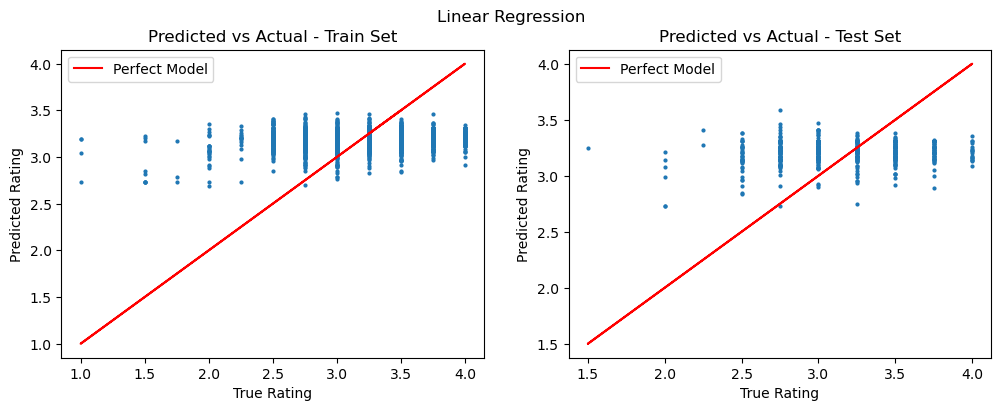

In [21]:
initialize_linear_regressor()

### Decision Trees

In [22]:
def initialize_decision_tree_regressor(max_depth:int):
    regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
    title = f"Decision Tree Regression - max_depth={max_depth}"
    run_regressor(regressor, title)

In [23]:
max_depth_slider_1 = widgets.IntSlider(value=10, min=1, max=20, step=1, description='max_depth:')
widgets.interact_manual(initialize_decision_tree_regressor,
                        max_depth=max_depth_slider_1);

interactive(children=(IntSlider(value=10, description='max_depth:', max=20, min=1), Button(description='Run In…

### Random Forest

In [24]:
def initialize_random_forest_regressor(n_estimators:int, max_depth:int):
    regressor = RandomForestRegressor(n_estimators=n_estimators, 
                                      max_depth=max_depth, random_state=0)
    title = f"Random Forest Regression - n_estimators={n_estimators} and max_depth={max_depth}"
    run_regressor(regressor, title)

In [25]:
n_estimators_slider = widgets.IntSlider(value=30, min=10, max=1000, step=5, description='n_estimators:')
max_depth_slider_2 = widgets.IntSlider(value=10, min=1, max=20, step=1, description='max_depth:')
widgets.interact_manual(initialize_random_forest_regressor,
                        n_estimators=n_estimators_slider,
                        max_depth=max_depth_slider_2
                        );

interactive(children=(IntSlider(value=30, description='n_estimators:', max=1000, min=10, step=5), IntSlider(va…

## Classification Models

In [29]:
filepath = os.path.join("data", "swiss_food_composition_proc.csv")
dataset = pd.read_csv(filepath, index_col=0)
dataset.head()

,name,category,energy_kcal,fat_g,fatty_acids_sat_g,fatty_acids_monounsat_g,fatty_acids_polyunsat_g,cholesterol_mg,carbohydrates_g,sugars_g,...,potassium_mg,sodium_mg,chloride_mg,calcium_mg,magnesium_mg,phosphorus_mg,iron_mg,iodide_µg,zinc_mg,split
ID,,,,,,,,,,,,,,,,,,,,,
2,Almond,fruits,2.383884,2.367211,0.007568,3.747869,1.491113,-0.536758,-0.392082,0.004006,...,1.588591,-0.159777,-0.148160,1.295299,4.040213,2.312243,0.749351,-0.106408,1.315695,train
3,"Almond, dry roasted, salted",nuts,2.458504,2.390231,0.007568,3.980279,1.745907,-0.536758,-0.285661,-0.117252,...,1.488645,-0.083438,0.108003,1.295299,4.816868,2.059374,0.906205,-0.088162,1.315695,train
4,"Almond, roasted, salted",nuts,2.527384,2.545613,0.020843,4.212688,1.825530,-0.536758,-0.419844,-0.138650,...,1.355384,-0.050088,0.108003,1.098111,4.622704,2.059374,0.749351,-0.088162,1.185016,test
5,"Amaranth, seed, cooked (without addition of fa...",cereals,-0.514820,-0.510234,-0.483593,-0.476516,-0.196900,-0.536758,0.084497,-0.431096,...,-0.377014,-0.159511,-0.149051,-0.098161,1.011260,0.226077,0.631711,-0.101432,-0.056440,test
6,"Amaranth, seed, raw",cereals,0.960362,-0.228244,-0.337572,-0.312462,0.121593,-0.536758,1.875138,-0.345502,...,0.722392,-0.158810,-0.132568,0.572278,4.234377,2.628328,2.984515,-0.087333,1.577054,train


In [30]:
def prepare_dataset(label:str, original_dataset:pd.DataFrame):
    
    ''' 
    This function is used to prepare the original dataset for the next steps in 
    supervised learning. It extracts the labels, does the manual encoding of the 
    category specified in the label parameter and splits the dataset into train and 
    test based on the split from Module 1. Also, here the features and labels are
    splitted in different dataframes.

    Args: 
        - label: the category that will be classified
        - original_datatset: the dataset
    
    Returns:
        - train_features, test_features, train_labels, test_labels
    '''
    
    labels = original_dataset['category']
    
    if label=='meat':
        one_hot_labels = labels.apply(lambda x: 1 if x == 'meat' else 0)
    elif label=='cereals':
        one_hot_labels = labels.apply(lambda x: 1 if x == 'cereals' else 0)
    elif label=='vegetables':
        one_hot_labels = labels.apply(lambda x: 1 if x == 'vegetables' else 0)
    
    original_dataset['category_binary'] = one_hot_labels
    train_data = original_dataset[original_dataset['split'] == 'train']
    test_data = original_dataset[original_dataset['split'] == 'test']
    
    not_needed_cols = ['name', 'category', 'split', 'category_binary']
    feature_cols = original_dataset.columns.difference(not_needed_cols)

    return train_data[feature_cols], test_data[feature_cols], \
        train_data['category_binary'], test_data['category_binary']

In [31]:
meat_train_set_features, \
    meat_test_set_features, \
    meat_train_set_labels, \
        meat_test_set_labels = prepare_dataset("meat", dataset)

In [68]:
def get_plot_titles(category:str, max_depth:int, n_estimators:int, clf_type:str):
    if clf_type=="lr":
        return f'Logistic Regression: category={category}'
    elif clf_type=="dt":
        return f'Decision Tree: category={category}: max_depth={max_depth}'
    elif clf_type=="rf":
        return f'Random Forest: category={category}: max_depth={max_depth} and n_estimators={n_estimators}'
    return None

def run_auc_roc_prc_2(clf, X_train, X_test, y_train, y_test, sup_title:str):

    roc_title = f'ROC - curve'
    prc_title = f'PRC - curve'
      
    print(f"Accuracy (Test): {accuracy_score(y_true=y_test, y_pred=clf.predict(X_test))*100:.2f}%")
    print(f"F1-score (Test): {f1_score(y_true=y_test, y_pred=clf.predict(X_test)):.2f}")
    print(f"Accuracy (Train): {accuracy_score(y_true=y_train, y_pred=clf.predict(X_train))*100:.2f}%")
    print(f"F1-score (Train): {f1_score(y_true=y_train, y_pred=clf.predict(X_train)):.2f}")

    _, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    axes[0].set_title(roc_title)
    axes[1].set_title(prc_title) 
    RocCurveDisplay.from_estimator(clf, X_test, y_test, name="Test set", ax=axes[0], alpha=0.8, plot_chance_level=True)
    RocCurveDisplay.from_estimator(clf, X_train, y_train, name="Train set", ax=axes[0], alpha=0.8)
    PrecisionRecallDisplay.from_estimator(clf, X_test, y_test, name="Test set", ax=axes[1], alpha=0.8, plot_chance_level=True)
    PrecisionRecallDisplay.from_estimator(clf, X_train, y_train, name="Train set", ax=axes[1], alpha=0.8)

    plt.suptitle(sup_title)
    plt.show()

### Logistic Regression

In [70]:
def run_logistic_regression_classifier():
    
    train_data_features, test_data_features, \
        train_data_labels, test_data_labels \
            = prepare_dataset(label="meat", original_dataset=dataset)
    
    sup_title = get_plot_titles('Meat', max_depth=None, \
                                n_estimators=None, clf_type="lr")

    lr_classifier = LogisticRegression(random_state=0)
    
    lr_classifier.fit(train_data_features, train_data_labels.values.ravel())
    
    run_auc_roc_prc_2(lr_classifier, X_train=train_data_features, 
                                   y_train=train_data_labels, X_test=test_data_features,
                                   y_test=test_data_labels, sup_title=sup_title)

Accuracy (Test): 98.16%
F1-score (Test): 0.95
Accuracy (Train): 98.85%
F1-score (Train): 0.97


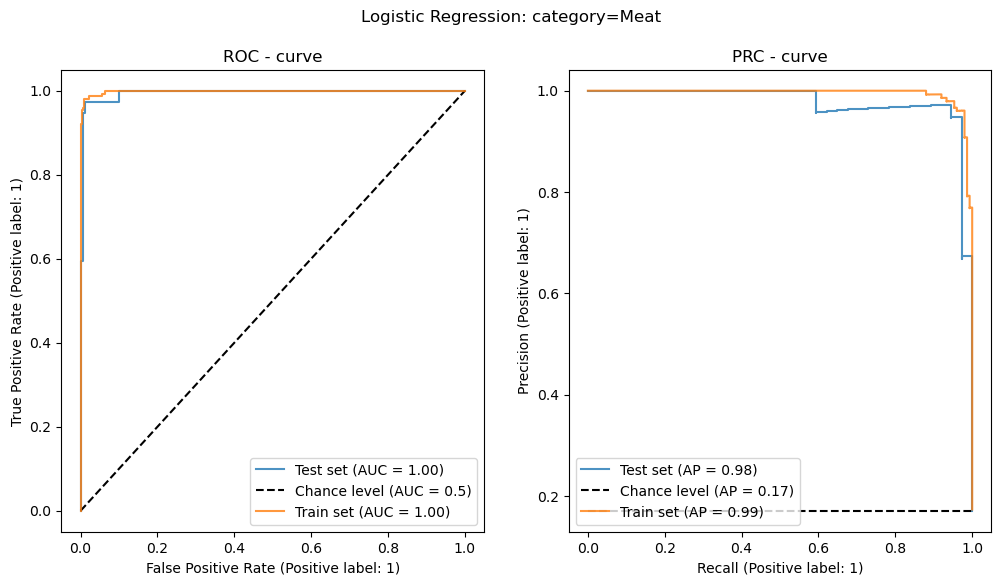

In [71]:
run_logistic_regression_classifier()

### Decision Trees

In [72]:
def run_decision_tree_classifier(max_depth:int):
    
    train_data_features, test_data_features, \
        train_data_labels, test_data_labels \
            = prepare_dataset(label="meat", original_dataset=dataset)
    
    sup_title = get_plot_titles('Meat', max_depth=max_depth, \
                                n_estimators=None, clf_type="dt")
    
    dt_classifier = DecisionTreeClassifier(max_depth=max_depth,
                                           random_state=0)
    
    dt_classifier.fit(train_data_features, train_data_labels.values.ravel())
    
    run_auc_roc_prc_2(dt_classifier, X_train=train_data_features, 
                                   y_train=train_data_labels, X_test=test_data_features,
                                   y_test=test_data_labels, sup_title=sup_title)

In [73]:
max_depth_slider_3 = widgets.IntSlider(value=10, min=1, max=20,\
                                        step=1, description='max_depth:')
widgets.interact_manual(run_decision_tree_classifier,
                        max_depth=max_depth_slider_3,
                        );

interactive(children=(IntSlider(value=10, description='max_depth:', max=20, min=1), Button(description='Run In…

### Random Forest

In [74]:
def run_random_forest_classifier(n_estimators:int, max_depth:int):
    
    train_data_features, test_data_features, \
        train_data_labels, test_data_labels \
            = prepare_dataset(label="meat", original_dataset=dataset)
    
    sup_title = get_plot_titles('Meat', n_estimators=n_estimators, \
                                max_depth=max_depth, clf_type="rf")

    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, 
                                           max_depth=max_depth,
                                           random_state=0)
    
    rf_classifier.fit(train_data_features, train_data_labels.values.ravel())
    
    run_auc_roc_prc_2(rf_classifier, X_train=train_data_features, 
                                   y_train=train_data_labels, X_test=test_data_features,
                                   y_test=test_data_labels, sup_title=sup_title)

In [55]:
n_estimators_slider = widgets.IntSlider(value=30, min=10, max=1000,\
                                         step=5, description='n_estimators:')
max_depth_slider_4 = widgets.IntSlider(value=10, min=1, max=20,\
                                        step=1, description='max_depth:')

In [75]:
widgets.interact_manual(run_random_forest_classifier, 
                        n_estimators=n_estimators_slider,
                        max_depth=max_depth_slider_4,
                        );

interactive(children=(IntSlider(value=30, description='n_estimators:', max=1000, min=10, step=5), IntSlider(va…

## Conclusion

**References:**

[1] https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/